# **Question 1 : Visualizing Pleiades cluster**

Our beloved astronomy club, Krittika, is named after one of the most conspicuous star cluster in the sky, Pleiades. The CSV file stardata.csv
contains four columns of data, which contain the following data for 196 stars in the cluster:


*   Column 1: RA of each star in degrees
*   Column 2: Declination of each star in degrees
*   Column 3: Parallax of each star in milliarcseconds (mas)
*   Column 4: Apparent Magnitude of the star


Parallax $p$ of a star is directly related to its distance $d$ as $d$ in parsecs $= \frac{1}{p}$ where parallax is in arcseconds.

Before proceeding, you need to be able to read the csv file contents, and since the assignment involves graphs, you might want to import some things as well:

In [4]:
#put your import statements here
#use one of the imported libraries to read the contents of csv file in a neat form

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file_path = r'C:\Users\91987\hello\stardata.csv'

sd = pd.read_csv(file_path, header=None, names = ["RA", "Declination", "Parallax", "Apparent Magnitude"])

A little background on magnitude of a star:

Magnitudes in Astronomy are a way to describe how bright an object (in our case, a star) is:

**Apparent magnitude**: Apparent magnitude ($m$) is a measure of the brightness of a star or any other astronomical object observed from the earth. It is similar to the decibel system for sound in that magnitudes are logarithmic and can be calculated according to the formula
$$m = -2.5 \log  { \left ( \dfrac{F}{F_0} \right )} $$
where $F$ is the flux from the star (measured in $W/m^2$), and $F_0$ is a reference flux. 

We can calculate the flux of a star at some distance $d$ away as
$$F = \dfrac{L}{4 \pi d^2}$$

where $L$ is the Luminosity of the star (measured in W).

**Absolute magnitude**: It is the magnitude of the star at a distance of 10 pc, and is related to the apparent magnitude by (and try to see if you can derive this):
$$m-M = -5 + 5\log_{10}(d)$$
where $M$ is the absolute magnitude and $d$ is the distance of the star from us in parsecs (pc).
To read up more about magnitudes, hit up this Wikipedia article - https://en.wikipedia.org/wiki/Magnitude_(astronomy%29.

Using the above info and the earlier relation of distance and parallax, use the imported libraries to find the absolute magnitudes of all the stars of the csv file, and plot a histogram of the distribution, with 50 bins.

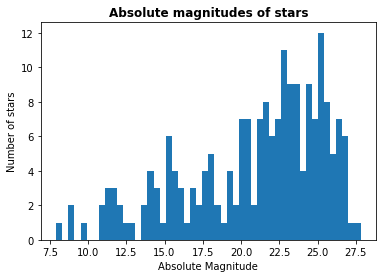

In [5]:
#Solution code

sd.drop(sd[sd['Parallax'] == "--"].index, inplace=True)

sd['Parallax'] = sd['Parallax'].astype(float)

sd['Distance'] = 1/sd['Parallax']
sd['Absolute Magnitude'] = sd['Apparent Magnitude'] + 5 - 5 * np.log(sd['Distance'])

no_bins = 50

plt.hist(sd['Absolute Magnitude'], no_bins)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of stars') 
plt.title('Absolute magnitudes of stars',
          fontweight ="bold")

plt.show()

A good way to visualize the actual star cluster as it appears to us in the night sky would be to make a scatter plot of declination and RA on the $y$ and $x$ axes respectively. Try plotting the stars such that the star appears bigger if it is brighter. One way to do this is to make the size of dots in scatter plot proportional to (12 - apparent magnitude) of the star.

(Hint: Google how to make a scatter plot with variable size of dots.)

If you can't make a plot with variable dot sizes, make a simple plot with all dots of same size.

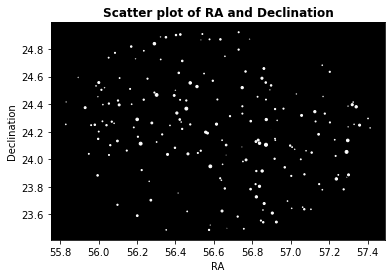

In [12]:
#Solution code

plt.scatter(sd['RA'],sd['Declination'] ,s = 12 - sd['Apparent Magnitude'] ,color='white')

plt.xlabel('RA')
plt.ylabel('Declination')
plt.title('Scatter plot of RA and Declination',fontweight ="bold")
ax = plt.gca()
ax.set_facecolor('black')
plt.show()